### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.10.0'

In [3]:
%matplotlib inline

In [4]:
#creating path
path = r"C:\Users\Sreelaya Narla\Desktop\Achievement 6\chocolate bar ratings analysis"

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, '02 data', 'prepared data', 'cleaned_flavors_of_cacao.csv'))

In [6]:
df.head()

,Company_(Maker-if_known),Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Unknown,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Unknown,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Unknown,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Unknown,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Unknown,Peru


In [19]:
df.shape

(1795, 10)

### 2.Variable Selection for Exploratory Analysis

To prepare the dataset for exploratory visual analysis, I focused on variables that directly relate to the research questions and removed those that don’t provide meaningful insights. The REF column was discarded since it only serves as a review identifier, and the Specific_Bean_Origin_or_Bar_Name column was excluded because it is too detailed and difficult to group for meaningful visualizations.

The variables retained for analysis are:

Cocoa_Percent → to examine its effect on ratings.

Rating → the main outcome variable.

Company_(Maker_if_known) → for comparing performance across chocolate makers.

Company_Location → to analyze chocolate quality by country.

Broad_Bean_Origin → to evaluate whether bean origins influence ratings.

Bean_Type → for optional exploratory analysis of cacao varietals.

Review_Date → to explore trends over time (2006–2017).

This refined set of variables ensures that the visualizations directly support the research questions while keeping the analysis clear and focused.

### 3.Correlation matrix heatmap

In [7]:
# Selecting numeric columns
numeric_cols = ['Cocoa_Percent', 'Rating', 'Review_Date']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()


In [8]:
corr_matrix

,Cocoa_Percent,Rating,Review_Date
Cocoa_Percent,1.000000,-0.164820,0.038177
Rating,-0.164820,1.000000,0.099846
Review_Date,0.038177,0.099846,1.000000


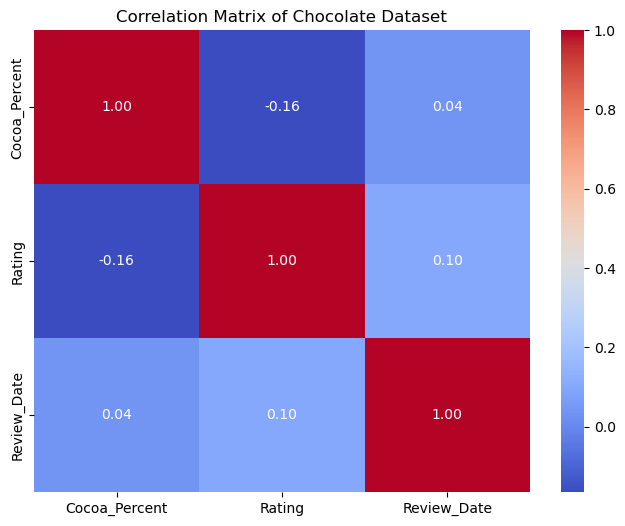

In [9]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(8,6))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
ax.set_title('Correlation Matrix of Chocolate Dataset')

# Show the plot
plt.show()

#### Correlation Matrix Interpretation

Cocoa_Percent vs. Rating (-0.16): There is a weak negative correlation between cocoa percentage and chocolate ratings. This suggests that, in general, bars with higher cocoa content tend to receive slightly lower ratings, but the relationship is not strong. Other factors, such as flavor profile or texture, likely play a bigger role in determining overall ratings.

Cocoa_Percent vs. Review_Date (0.038): The correlation is very close to zero, indicating no meaningful relationship between cocoa percentage and the year of review. This suggests that cocoa content has remained relatively consistent over time in the sampled chocolate bars.

Rating vs. Review_Date (0.10): There is a very weak positive correlation between rating and review date, implying a slight trend of increasing ratings over time. However, the effect is minimal and may not be practically significant.

Overall: The correlations show that numeric variables in the dataset are largely independent. Cocoa percentage has a small negative effect on rating, and there is no strong temporal trend in cocoa content or ratings over the years.

In [10]:
# Save the figure
fig.savefig(os.path.join(path, '04 analysis', 'visualizations', "correlation_heatmap.png"), dpi=300, bbox_inches='tight')

### 4.Create a scatterplot (or plots) for the variables with the strongest correlations 

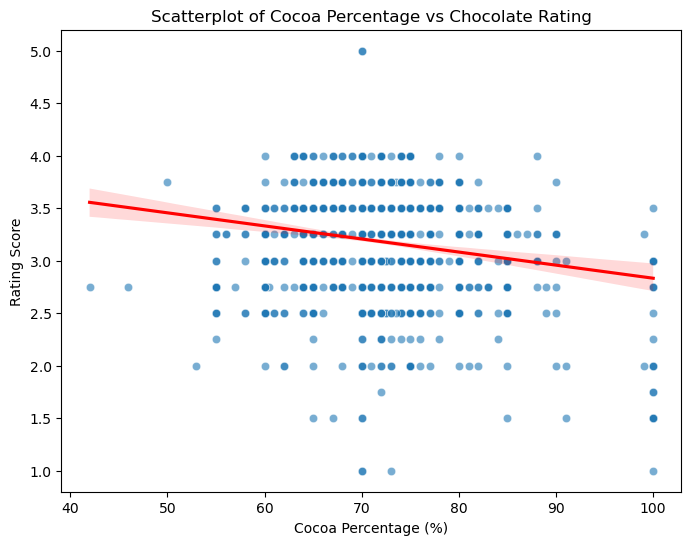

In [11]:
# Scatterplot for Cocoa % vs Rating
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df, x="Cocoa_Percent", y="Rating", alpha=0.6, ax=ax)
sns.regplot(data=df, x="Cocoa_Percent", y="Rating", scatter=False, color="red", ax=ax)  # regression line
ax.set_title("Scatterplot of Cocoa Percentage vs Chocolate Rating")
ax.set_xlabel("Cocoa Percentage (%)")
ax.set_ylabel("Rating Score")

plt.show()


In [12]:
# Save figure
fig.savefig(os.path.join(path,'04 analysis', 'visualizations', "scatter_cocoa_vs_rating.png"), dpi=300, bbox_inches="tight")

#### Interpretation of Scatterplot: Cocoa Percentage vs Chocolate Rating

The scatterplot shows a slight negative trend between cocoa percentage and chocolate ratings. The regression line (in red) highlights this relationship, though the correlation is weak (-0.16). This means that chocolates with higher cocoa content tend to receive marginally lower ratings.

A possible reason for this pattern could be that chocolates with very high cocoa percentages (often 85% and above) are more bitter, which may not appeal to all reviewers. On the other hand, chocolates with lower cocoa content may be sweeter and more widely appreciated, resulting in slightly higher ratings.

Despite the negative trend, the scatterplot also shows considerable variation. There are chocolates across all cocoa levels that still receive both high and low ratings, indicating that cocoa percentage alone does not fully explain consumer preference. Other factors such as flavor complexity, origin of beans, and brand reputation may also play significant roles in shaping ratings.

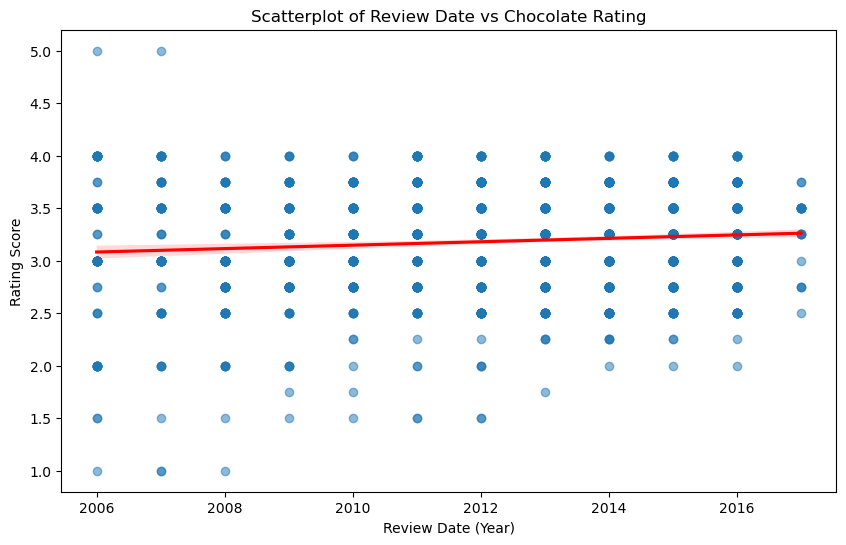

In [13]:
# Scatterplot of Review Date vs Chocolate Rating
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x='Review_Date', y='Rating', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=ax)
ax.set_title('Scatterplot of Review Date vs Chocolate Rating')
ax.set_xlabel('Review Date (Year)')
ax.set_ylabel('Rating Score')
plt.show()

In [14]:
# Save the figure
fig.savefig(os.path.join(path,'04 analysis', 'visualizations', "scatter_reviewdate_vs_rating.png"), dpi=300, bbox_inches='tight')

#### Interpretation of Scatterplot: Review Date vs Chocolate Rating

Interpretation of Scatterplot: Review Date vs Chocolate Rating

The scatterplot shows the relationship between the year of review (Review Date) and the chocolate rating scores. Overall, the trend line indicates a slight positive relationship between review year and rating. This means that, on average, chocolate ratings have increased a little over time.

However, the relationship is very weak, as ratings are spread widely across all years, with most scores clustering between 2.5 and 3.5 regardless of the year. This suggests that while there might be a minor upward trend in ratings, the majority of chocolates consistently receive average ratings throughout the observed period.

In summary, chocolate ratings have remained fairly stable over time, with only a small tendency toward improvement

### 5.Create a pair plot of the entire data set

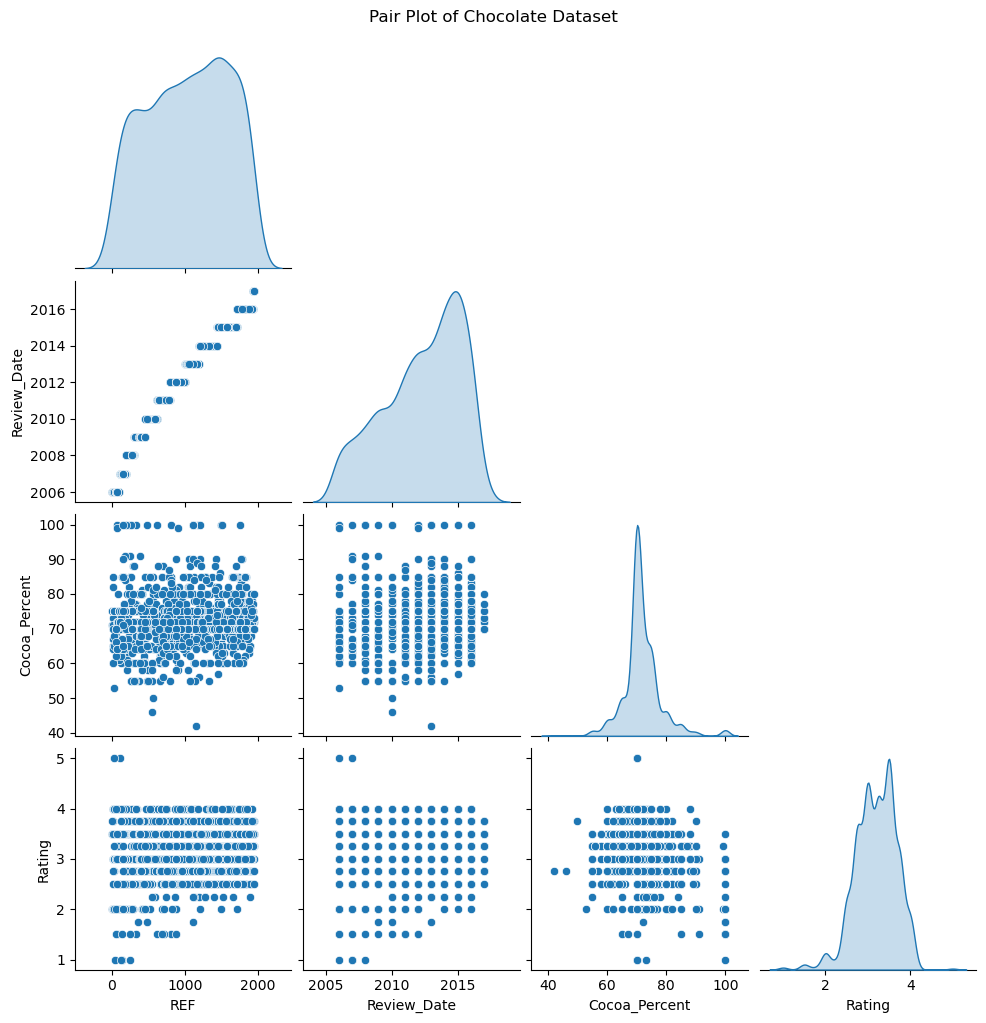

In [15]:
# Pair plot of the entire dataset
pairplot = sns.pairplot(df, diag_kind='kde', corner=True)

plt.suptitle("Pair Plot of Chocolate Dataset", y=1.02)  # Add a title
plt.show()

In [16]:
# Save the figure
pairplot.savefig(os.path.join(path,'04 analysis', 'visualizations', "pairplot_chocolate_dataset.png"), dpi=300, bbox_inches='tight')


#### Interpretation of the Pair Plot

The pair plot provides a comprehensive view of relationships between multiple variables in the chocolate dataset.

Diagonal (Distributions):

REF and Review_Date are right-skewed, with more chocolates reviewed in earlier years and lower reference numbers.

Cocoa_Percent is clustered around 70%, suggesting most chocolates fall in this range.

Rating is skewed toward 3–4, showing most chocolates receive above-average scores.

Off-Diagonal (Scatterplots):

Review_Date vs REF shows a clear positive relationship, confirming REF increases with later reviews (likely a chronological index).

Cocoa_Percent vs Rating shows a weak negative trend, consistent with the earlier correlation results (higher cocoa content does not guarantee higher ratings).

REF vs Rating and Review_Date vs Rating show little to no strong correlation, suggesting that ratings remain fairly consistent over time.

Note: Since REF is more of an index than a true variable, its relationships with other features are not analytically meaningful, though they confirm chronological ordering.

Conclusion:
The pair plot confirms that most chocolates fall in the 70% cocoa range, with ratings clustered around 3–4. Cocoa percentage and review year have only weak influence on rating scores.

### 6.Create a categorical plot 

In [17]:
# Create cocoa categories
df['Cocoa_Category'] = pd.cut(
    df['Cocoa_Percent'],
    bins=[0, 60, 80, 100],   # cutoffs for low/medium/high
    labels=['Low (<60%)', 'Medium (60–80%)', 'High (>80%)']
)

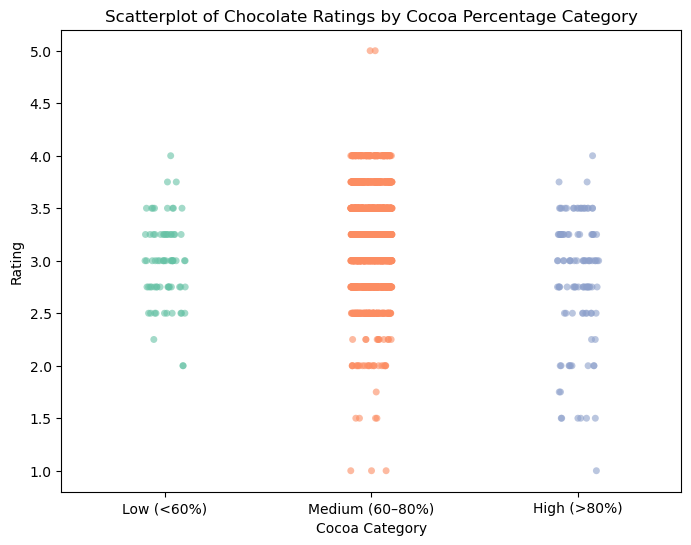

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
sns.stripplot(
    x="Cocoa_Category",
    y="Rating",
    hue="Cocoa_Category",
    data=df,
    jitter=True,
    alpha=0.6,
    palette="Set2",
    dodge=False,
    legend=False,
    ax=ax
)

ax.set_title("Scatterplot of Chocolate Ratings by Cocoa Percentage Category")
ax.set_xlabel("Cocoa Category")
ax.set_ylabel("Rating")

# Save the figure
fig.savefig(os.path.join(path, '04 analysis', 'visualizations', "scatterplot_cocoa_category_vs_rating.png"), 
            dpi=300, bbox_inches='tight')

plt.show()

#### Interpretation
Spread of Ratings Across Categories:

Ratings are spread across all categories, but most points cluster between 2.5 and 4.0.
This suggests that reviewers tend to give moderate-to-good ratings regardless of cocoa percentage

Most chocolates with 60–80% cocoa received ratings in the 2.5–4.0 range, showing consistent mid-to-high scores. A couple of chocolates in this category even reached the top rating of 5, but those are rare. This suggests that while chocolates in this range are generally well-regarded, only a few are considered exceptional.

### 7

#### Revisiting Research Questions

Q1. Does cocoa percentage influence chocolate ratings?

From the scatterplot and categorical plot, most chocolates with 60–80% cocoa scored between 2.5 and 4.0.

A few outliers scored a perfect 5, but they were rare.

Chocolates with cocoa below 60% or above 80% didn’t show stronger trends, suggesting that while cocoa percentage might affect flavor, it isn’t the sole driver of high ratings.

Q2. How have chocolate ratings changed over time?

The scatterplot of Review Date vs Rating shows ratings distributed fairly consistently across years.

There is no strong upward or downward trend in average ratings over time, which suggests that review standards and preferences have remained stable.

Q3. Are there relationships among variables such as Cocoa %, Rating, and Review Date?

The correlation matrix shows a weak negative correlation between cocoa percentage and rating (-0.16).

Review date has a very slight positive correlation with rating (0.09), which is too weak to conclude any meaningful relationship.

This means ratings are influenced by multiple factors beyond just cocoa % or review year.

New Questions That Arose

Are there specific brands or countries that consistently receive higher ratings?

Do certain flavor additives (e.g., nuts, fruit) correlate with higher or lower ratings?

Is there an optimal cocoa range (like 65–75%) where ratings peak?

### Hypotheses

Cocoa percentage and ratings

H0 (Null Hypothesis): Cocoa percentage has no effect on chocolate ratings.

H1 (Alternative Hypothesis): Chocolates with cocoa percentages between 60–80% tend to receive higher ratings compared to chocolates outside this range.

Ratings over time

H0: Chocolate ratings have remained consistent over time.

H1: There is a significant trend (increase or decrease) in chocolate ratings over the years.

Brand or country influence (to be explored later)

H0: The average rating does not differ across brands or countries of origin.

H1: Certain brands or countries consistently receive higher ratings than others.